In [1]:
import pyforest

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(4)

<IPython.core.display.Javascript object>

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.6+ KB


In [4]:
df.shape

(13320, 9)

In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df_null = df.isna().sum()
df_null

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
sns.heatmap(df.isna())
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 2 Axes>

In [8]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
Bhmesy     51
Prtanha    51
Prityel    50
Prarkun    49
PrityTr    49
Dhalsh     47
IBityin    45
SNity S    40
Soresea    39
Adeatlm    37
Soitya     36
Rosha I    35
Bhe 2ko    35
SunceEs    34
SNnia E    33
JRrnauv    30
MenueNo    29
PuandHi    28
Prlla C    28
RothaVa    27
Prncyrn    27
Raard B    26
Puachal    26
Aklia R    26
PhestOn    26
           ..
SuBayin     1
Thowsil     1
Pao 2Sm     1
Hoensti     1
Oaines      1
DSestre     1
Shensit     1
GaentAp     1
BrriaIm     1
Vaw 2il     1
Apntsal     1
SBiewid     1
SaideHi     1
CSncele     1
AkoreEn     1
GancyRe     1
GaityEt     1
Prtusth     1
Halms S     1
Arnts A     1
VBeriav     1
Viissmi     1
Arhtsth     1
Dhniail     1
Vincy R     1
Viodspr     1
FlsicFl     1
Toeadp      1
Caiya D     1
Kelia R     1
Name: society, Length: 2688, dtype: int64

In [9]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [10]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [11]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
corr_df = df.corr()
corr_df

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [13]:
data = df.drop(['area_type','availability','balcony','society'],axis=1)

In [14]:
data.head(3)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [15]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
data.shape

(13320, 5)

# NULL data

In [17]:
data[data.isnull().any(axis=1)]

,location,size,total_sqft,bath,price
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820
344,Kanakpura Road,1 BHK,525,NaN,21.530
568,NaN,3 BHK,1600,3.0,86.000
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
669,JP Nagar,5 BHK,4400 - 6640,NaN,375.000
702,JP Nagar,5 BHK,4400 - 6800,NaN,548.500
801,JP Nagar,4 BHK,4000 - 5249,NaN,453.000
941,Whitefield,4 Bedroom,3606 - 5091,NaN,304.000


## # Location missing

In [18]:
data[data['location'].isna()]

,location,size,total_sqft,bath,price
568,NaN,3 BHK,1600,3.0,86.0


In [19]:
data[data['bath'].isna()]

,location,size,total_sqft,bath,price
56,Devanahalli,4 Bedroom,3010 - 3410,NaN,192.000
81,Hennur Road,4 Bedroom,2957 - 3450,NaN,224.500
224,Devanahalli,3 BHK,1520 - 1740,NaN,74.820
344,Kanakpura Road,1 BHK,525,NaN,21.530
579,Sarjapur Road,NaN,1200 - 2400,NaN,34.185
669,JP Nagar,5 BHK,4400 - 6640,NaN,375.000
702,JP Nagar,5 BHK,4400 - 6800,NaN,548.500
801,JP Nagar,4 BHK,4000 - 5249,NaN,453.000
941,Whitefield,4 Bedroom,3606 - 5091,NaN,304.000
1264,Hennur,3 Bedroom,2264,NaN,155.000


In [20]:
data.dropna(axis=0,inplace=True)

In [21]:
data.shape

(13246, 5)

In [22]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
14 BHK           1
19 BHK           1
16 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
18 Bedroom       1
13 BHK           1
Name: size, dtype: int64

In [23]:
a = '2 BHK'

int(a.split(' ')[0])


2

In [24]:
def bhk_change(row):
    return int(row.split(' ')[0])

In [25]:
data['BHK'] = data['size'].apply(bhk_change)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13246 non-null object
bath          13246 non-null float64
price         13246 non-null float64
BHK           13246 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [27]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [28]:
data[data['BHK']>=10].shape

(26, 6)

In [29]:
data[data['BHK']>=20].shape

(2, 6)

In [30]:
data[data['BHK']>=20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [31]:
data['total_sqft'].value_counts()

1200              843
1100              221
1500              204
2400              195
600               180
1000              172
1350              132
1050              123
1300              117
1250              114
900               112
1400              108
1800              104
1150              101
1600              100
1140               91
2000               82
1450               70
1650               69
800                67
1075               66
3000               66
1020               63
2500               62
1125               60
1550               60
1160               60
950                59
1180               58
1700               58
                 ... 
1269.72             1
2615                1
204Sq. Meter        1
1701                1
2631                1
850 - 1093          1
3489                1
2100 - 2850         1
3381                1
2370                1
2806 - 3019         1
1568                1
664 - 722           1
612                 1
30400     

In [32]:
data['total_sqft']

0               1056
1               2600
2               1440
3               1521
4               1200
5               1170
6               2732
7               3300
8               1310
9               1020
10              1800
11              2785
12              1000
13              1100
14              2250
15              1175
16              1180
17              1540
18              2770
19              1100
20               600
21              1755
22              2800
23              1767
24               510
25              1250
26               660
27              1610
28              1151
29              1025
            ...     
13290           4050
13291            812
13292           1440
13293           2425
13294           2200
13295           1810
13296           1200
13297           1060
13298           1015
13299    2830 - 2882
13300           1500
13301           1454
13302           1075
13303            774
13304           1187
13305            500
13306        

In [33]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [34]:
df2 = data[data['total_sqft'].apply(is_float)]
df2.head(7)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4


In [35]:
df2.shape

(13056, 6)

In [36]:
data.shape

(13246, 6)

In [37]:
df2.drop(['size'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
df2.shape

(13056, 5)

In [39]:
def convert_sqrt_to_num(x):
    ww = x.split('-')
    if len(ww)==2:
        return (float(ww[0])+float(ww[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [40]:
convert_sqrt_to_num('10332')

10332.0

In [41]:
convert_sqrt_to_num('110-110')

110.0

In [42]:
convert_sqrt_to_num('1234.skl')

In [43]:
df3 = df2.copy()
df3.shape

(13056, 5)

In [44]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqrt_to_num)

In [45]:
df3.shape

(13056, 5)

In [46]:
df3.head(2)

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4


In [47]:
df2.total_sqft.value_counts()

1200       843
1100       221
1500       204
2400       195
600        180
1000       172
1350       132
1050       123
1300       117
1250       114
900        112
1400       108
1800       104
1150       101
1600       100
1140        91
2000        82
1450        70
1650        69
800         67
1075        66
3000        66
1020        63
2500        62
1550        60
1125        60
1160        60
950         59
1700        58
1180        58
          ... 
1689.28      1
3309         1
583          1
959          1
590          1
1623.29      1
866.28       1
1990         1
14000        1
2733         1
4166         1
5530         1
817          1
2526         1
1413         1
804.1        1
315          1
4772         1
2795         1
2648         1
2511         1
1932.47      1
3990         1
1429         1
2006.8       1
897          1
5700         1
3293         1
908          1
5            1
Name: total_sqft, Length: 1894, dtype: int64

In [48]:
df3.loc[1350]

location      Hosa Road
total_sqft         1079
bath                  2
price             32.37
BHK                   2
Name: 1350, dtype: object

In [49]:
df3['location'].value_counts()

Whitefield                         517
Sarjapur  Road                     386
Electronic City                    302
Kanakpura Road                     260
Thanisandra                        222
Yelahanka                          203
Uttarahalli                        185
Marathahalli                       175
Hebbal                             172
Raja Rajeshwari Nagar              171
7th Phase JP Nagar                 148
Hennur Road                        148
Bannerghatta Road                  145
Haralur Road                       141
Electronic City Phase II           129
Rajaji Nagar                       105
Chandapura                          96
Bellandur                           96
Electronics City Phase 1            86
KR Puram                            84
Hoodi                               84
Begur Road                          82
Yeshwanthpur                        82
Kasavanhalli                        79
Harlur                              77
Sarjapur                 

In [50]:
len(df3.location.unique())

1298

# Feature Engineering

In [51]:
data = df3.copy()

In [52]:
data['price_per_sqft'] = data['price']*100000 / data['total_sqft']

# Handling dimentionality

In [53]:
data.location = data.location.apply(lambda x:x.strip())

In [54]:
locations = data.location.value_counts().sort_values(ascending=False)
locations

Whitefield                                      518
Sarjapur  Road                                  386
Electronic City                                 304
Kanakpura Road                                  260
Thanisandra                                     225
Yelahanka                                       203
Uttarahalli                                     185
Marathahalli                                    175
Hebbal                                          172
Raja Rajeshwari Nagar                           171
Hennur Road                                     148
7th Phase JP Nagar                              148
Bannerghatta Road                               145
Haralur Road                                    141
Electronic City Phase II                        129
Rajaji Nagar                                    105
Bellandur                                        96
Chandapura                                       96
Electronics City Phase 1                         86
KR Puram    

In [55]:
locations[locations>=10].count()

254

In [56]:
locations[locations>=10]

Whitefield                   518
Sarjapur  Road               386
Electronic City              304
Kanakpura Road               260
Thanisandra                  225
Yelahanka                    203
Uttarahalli                  185
Marathahalli                 175
Hebbal                       172
Raja Rajeshwari Nagar        171
Hennur Road                  148
7th Phase JP Nagar           148
Bannerghatta Road            145
Haralur Road                 141
Electronic City Phase II     129
Rajaji Nagar                 105
Bellandur                     96
Chandapura                    96
Electronics City Phase 1      86
KR Puram                      84
Hoodi                         84
Yeshwanthpur                  82
Begur Road                    82
Kasavanhalli                  79
Harlur                        77
Sarjapur                      75
Banashankari                  74
Ramamurthy Nagar              72
Kengeri                       72
Koramangala                   72
          

In [57]:
locations[locations<10].count()

1033

In [58]:
less_loc_10 = locations[locations<10]
less_loc_10

4th Block Koramangala                           9
Chennammana Kere                                9
Yemlur                                          9
Lingarajapuram                                  9
Vignana Nagar                                   9
Kaverappa Layout                                9
Vishwanatha Nagenahalli                         9
Jakkur Plantation                               9
Medahalli                                       9
2nd Phase JP Nagar                              9
Peenya                                          9
Richmond Town                                   9
Banagiri Nagar                                  9
Mathikere                                       9
Gollahalli                                      9
Ejipura                                         9
Kamakshipalya                                   9
Chandra Layout                                  9
B Narayanapura                                  9
KUDLU MAIN ROAD                                 9


In [59]:
len(data['location'].unique())

1287

In [60]:
data['location'] = data['location'].apply(lambda x:'other' if x in less_loc_10 else x)

In [61]:
len(data.location.value_counts())

255

In [62]:
data[data.location=='other'][:4]

,location,total_sqft,bath,price,BHK,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
18,other,2770.0,4.0,290.0,3,10469.314079
19,other,1100.0,2.0,48.0,2,4363.636364
25,other,1250.0,3.0,56.0,3,4480.000000


In [63]:
data.head(2)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615


# Outliers

In [64]:
data.shape

(13056, 6)

In [65]:
#let say 100sq.ft/bedroom

#bedroom/bathroom or +1

In [66]:
data.head(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


In [67]:
data.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13056.000000,13056.000000,13056.000000,13056.000000,1.305600e+04
mean,1554.458192,2.691942,112.508062,2.805300,7.952593e+03
std,1238.479835,1.336034,149.687320,1.293624,1.073136e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266434e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.454545e+03
75%,1670.000000,3.000000,120.000000,3.000000,7.340052e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### BHK vs Total_sqft

In [68]:
df = data[~(data['total_sqft']/data['BHK']<100)] # Ft - 10 x 10 == 100 ..It is common bedroom size in india.
df

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [69]:
df.shape

(13016, 6)

In [70]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13016.000000,13016.000000,13016.000000,13016.000000,13016.000000
mean,1557.464056,2.678473,112.472976,2.789413,6684.889693
std,1238.981909,1.270469,149.813905,1.213504,4527.246659
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4262.295082
50%,1275.000000,2.000000,72.000000,3.000000,5445.095326
75%,1674.000000,3.000000,120.000000,3.000000,7312.148324
max,52272.000000,27.000000,3600.000000,27.000000,176470.588235


### price_per_sqft

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

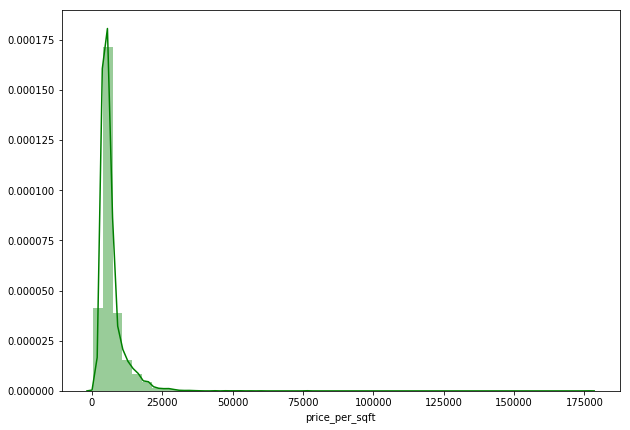

In [71]:
plt.figure(figsize=(10,7))
sns.distplot(df['price_per_sqft'],color='g')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

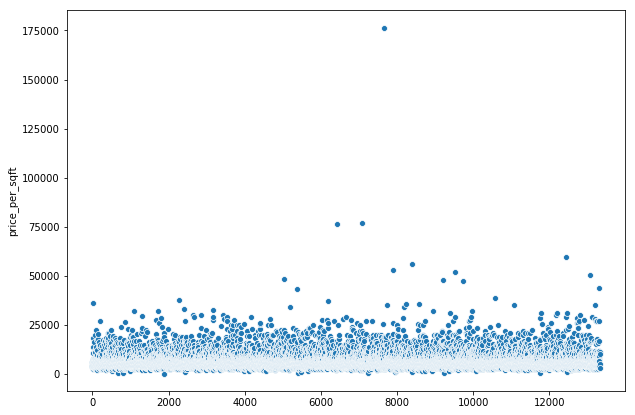

In [72]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df.index,y=df['price_per_sqft'])
plt.show()

In [73]:
df['price_per_sqft'].mean()

6684.889692912423

In [74]:
df['price_per_sqft'].min()

267.82981328435875

In [75]:
df = df[~(df['price_per_sqft']<2500)]
df.shape

# Currently the avg sq.ft in bangalore is starts from 3000 onwords..... But if we apply, then we lost 512 data points... lets see how it is with 2500.. 
# And the data collected 6years ago... so atleast we need to consider RS.2500/- to balance both past and present... 

(12932, 6)

In [76]:
df.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12932.000000,12932.000000,12932.000000,12932.000000,12932.000000
mean,1538.343733,2.681488,112.893841,2.791680,6715.787942
std,958.462528,1.268130,150.127124,1.210783,4525.371736
min,250.000000,1.000000,8.000000,1.000000,2500.000000
25%,1100.000000,2.000000,50.000000,2.000000,4284.323272
50%,1276.000000,2.000000,72.000000,3.000000,5461.640418
75%,1670.000000,3.000000,120.000000,3.000000,7333.568406
max,30400.000000,27.000000,3600.000000,27.000000,176470.588235


### Bath vs BHK

In [77]:
# In any type of BHK has personal bathrooms and may or may not be 1 extra bathroom..


# 1BHK - 1 bathroom(P) ,+-  (C)

# 2BHK - 2bathroom(P) +- (C)

In [78]:
df[['bath','BHK']]

,bath,BHK
0,2.0,2
1,5.0,4
2,2.0,3
3,3.0,3
4,2.0,2
5,2.0,2
6,4.0,4
7,4.0,4
8,3.0,3
9,6.0,6


In [79]:
#df[(df['BHK']>=df['bath']+1) | (df['BHK']>=df['bath']-1)][['BHK','bath']]

In [80]:
np.diff([df['BHK'],df['bath']],axis=0).min()

<IPython.core.display.Javascript object>

-6.0

In [81]:
np.diff([df['BHK'],df['bath']],axis=0).max()

<IPython.core.display.Javascript object>

5.0

In [82]:
condition = np.diff([df['BHK'],df['bath']],axis=0)
condition.shape

<IPython.core.display.Javascript object>

(1, 12932)

In [83]:
condition

array([[ 0.,  1., -1., ...,  0.,  0.,  0.]])

In [84]:
v = condition.reshape(-1,1)
v.shape

(12932, 1)

In [85]:
index=[]
c=0
for i in v:
    if i==1 or i==-1 or i==0:
        #print(i)
        if c not in index:
            
            index.append(c)
    c+=1
len(index)

12572

In [86]:
df.shape

(12932, 6)

In [87]:
#df[df.index.isin(index)].shape

In [88]:
house_data =df.loc[index]
house_data.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


(12572, 6)

In [89]:
house_data.head(3)

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556


In [90]:
house_data.tail(10)

,location,total_sqft,bath,price,BHK,price_per_sqft
12921,other,1719.0,3.0,95.00,3.0,5526.468877
12922,Abbigere,995.0,2.0,40.80,2.0,4100.502513
12924,Bellandur,1047.0,2.0,75.00,2.0,7163.323782
12925,Devanahalli,1466.0,3.0,59.96,3.0,4090.040928
12926,Sarjapur Road,1691.0,3.0,100.00,3.0,5913.660556
12927,Chandapura,876.0,2.0,28.47,2.0,3250.000000
12928,CV Raman Nagar,1659.0,3.0,135.00,3.0,8137.432188
12929,Whitefield,1270.0,2.0,105.00,2.0,8267.716535
12930,8th Phase JP Nagar,1269.0,2.0,50.75,3.0,3999.211978
12931,Kammanahalli,1200.0,3.0,80.00,2.0,6666.666667


In [91]:
loc_gp = house_data.groupby('location')

In [92]:
loc_gp['total_sqft'].agg(['mean','std'])

,mean,std
location,,
1st Block Jayanagar,1767.692308,661.827065
1st Block Koramangala,2016.111111,795.392112
1st Phase JP Nagar,1813.739130,787.358254
2nd Phase Judicial Layout,1175.600000,359.557197
2nd Stage Nagarbhavi,1419.565217,881.725984
5th Block Hbr Layout,1849.000000,1275.755320
5th Phase JP Nagar,1354.971429,602.284498
6th Phase JP Nagar,1364.391304,571.126219
7th Phase JP Nagar,1481.126761,669.425581


In [93]:
df[(df['location']=='Whitefield') & ( df['BHK']==3)]

,location,total_sqft,bath,price,BHK,price_per_sqft
10,Whitefield,1800.0,2.0,70.00,3,3888.888889
27,Whitefield,1610.0,3.0,81.00,3,5031.055901
52,Whitefield,2010.0,3.0,91.00,3,4527.363184
400,Whitefield,1910.0,3.0,161.00,3,8429.319372
541,Whitefield,1768.0,3.0,101.00,3,5712.669683
544,Whitefield,1500.0,3.0,61.95,3,4130.000000
583,Whitefield,2500.0,3.0,313.00,3,12520.000000
619,Whitefield,1790.0,3.0,100.00,3,5586.592179
625,Whitefield,1720.0,3.0,100.00,3,5813.953488
714,Whitefield,1640.0,4.0,91.00,3,5548.780488


In [94]:
house_data.to_csv('clean_house.csv',index=False)

# Modeling

In [324]:
df = pd.read_csv('clean_house.csv')
df.head()

<IPython.core.display.Javascript object>

,location,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,51.00,2.0,4250.000000


In [325]:
df.isna().sum()

location          377
total_sqft        377
bath              377
price             377
BHK               377
price_per_sqft    377
dtype: int64

In [326]:
dummy = pd.get_dummies(df['location'],drop_first=True)

<IPython.core.display.Javascript object>

In [327]:
data = pd.concat([df,dummy],axis=1)
data.shape

<IPython.core.display.Javascript object>

(12572, 260)

In [328]:
data.head(2)

,location,total_sqft,bath,price,BHK,price_per_sqft,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Electronic City Phase II,1056.0,2.0,39.07,2.0,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0,4615.384615,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [329]:
data.drop(['location','price_per_sqft'],axis=1,inplace=True)

In [330]:
data.shape

(12572, 258)

In [331]:
data.isna().sum()

total_sqft                   377
bath                         377
price                        377
BHK                          377
1st Block Koramangala          0
1st Phase JP Nagar             0
2nd Phase Judicial Layout      0
2nd Stage Nagarbhavi           0
5th Block Hbr Layout           0
5th Phase JP Nagar             0
6th Phase JP Nagar             0
7th Phase JP Nagar             0
8th Phase JP Nagar             0
9th Phase JP Nagar             0
AECS Layout                    0
Abbigere                       0
Akshaya Nagar                  0
Ambalipura                     0
Ambedkar Nagar                 0
Amruthahalli                   0
Anandapura                     0
Ananth Nagar                   0
Anekal                         0
Anjanapura                     0
Ardendale                      0
Arekere                        0
Attibele                       0
BEML Layout                    0
BTM 1st Stage                  0
BTM 2nd Stage                  0
          

In [332]:
#from sklearn.preprocessing import Imputer

In [333]:
#imp = Imputer(strategy='median')

In [334]:
#data = imp.fit_transform(data.drop('price',axis=1))

In [335]:
#imp.statistics_

In [336]:
data.dropna(inplace=True)

In [337]:
data.head(2)

,total_sqft,bath,price,BHK,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1056.0,2.0,39.07,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,120.00,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [338]:
data.isna().sum()

total_sqft                   0
bath                         0
price                        0
BHK                          0
1st Block Koramangala        0
1st Phase JP Nagar           0
2nd Phase Judicial Layout    0
2nd Stage Nagarbhavi         0
5th Block Hbr Layout         0
5th Phase JP Nagar           0
6th Phase JP Nagar           0
7th Phase JP Nagar           0
8th Phase JP Nagar           0
9th Phase JP Nagar           0
AECS Layout                  0
Abbigere                     0
Akshaya Nagar                0
Ambalipura                   0
Ambedkar Nagar               0
Amruthahalli                 0
Anandapura                   0
Ananth Nagar                 0
Anekal                       0
Anjanapura                   0
Ardendale                    0
Arekere                      0
Attibele                     0
BEML Layout                  0
BTM 1st Stage                0
BTM 2nd Stage                0
                            ..
Somasundara Palya            0
Sompura 

In [339]:
data.shape

(12195, 258)

In [340]:
corr = data.corr()
corr['price']

total_sqft                   0.744523
bath                         0.476753
price                        1.000000
BHK                          0.418083
1st Block Koramangala        0.031353
1st Phase JP Nagar           0.020678
2nd Phase Judicial Layout   -0.013093
2nd Stage Nagarbhavi         0.033032
5th Block Hbr Layout         0.020046
5th Phase JP Nagar          -0.012693
6th Phase JP Nagar          -0.001968
7th Phase JP Nagar          -0.008776
8th Phase JP Nagar          -0.014830
9th Phase JP Nagar          -0.009099
AECS Layout                 -0.010488
Abbigere                    -0.017707
Akshaya Nagar               -0.013286
Ambalipura                  -0.002042
Ambedkar Nagar               0.025647
Amruthahalli                -0.006129
Anandapura                  -0.017363
Ananth Nagar                -0.026845
Anekal                      -0.026952
Anjanapura                  -0.011260
Ardendale                    0.006692
Arekere                     -0.003928
Attibele    

In [341]:
X = data.drop('price',axis=1)
Y = data['price'] 

In [342]:
from sklearn.model_selection import train_test_split

In [343]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [344]:
from sklearn.linear_model import LinearRegression

In [345]:
lr = LinearRegression()

In [346]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [347]:
lr_pred = lr.predict(x_test)

In [348]:
acc_test = lr.score(x_test,y_test)
acc_test

0.6886533881353748

In [349]:
acc_train = lr.score(x_train,y_train)
acc_train

0.6241653336266271

In [350]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [351]:
r2_score(y_test,lr_pred)

0.6886533881353748

In [352]:
mean_absolute_error(y_test,lr_pred)

38.443024330311076

In [353]:
mse = mean_squared_error(y_test,lr_pred)
mse

4817.169731103466

In [354]:
rmse = np.sqrt(mse)
rmse

<IPython.core.display.Javascript object>

69.40583355240008

# Cross_validations

In [355]:
from sklearn.model_selection import ShuffleSplit,cross_val_score,GridSearchCV

In [356]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=45)
cross_val_score(lr,X,Y,cv=cv)

array([0.66101314, 0.64976892, 0.60092433, 0.56960071, 0.67690851])

In [357]:
from sklearn.tree import DecisionTreeRegressor

In [358]:
def find_best_model(X,Y):
    algos = {
        
        'linear_reg':{
            'model':LinearRegression(),
        'params' :{
            'normalize':[True,False]
        }
    },
        
    'DT_reg':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['mse', 'friedman_mse', 'mae'],
            'splitter':['best','random']
        }
    }
    }
    
    
    scores =[]
    
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=567)
    
    for algo_name,config in algos.items():
        gd = GridSearchCV(config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        
        scores.append({
            'model':algo_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_
            
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [359]:
find_best_model(X,Y) #x_train,y_train

<IPython.core.display.Javascript object>

,model,best_score,best_params
0,linear_reg,0.635072,{'normalize': True}
1,DT_reg,0.504850,"{'criterion': 'mae', 'splitter': 'best'}"


In [ ]:
dt_reg = DecisionTreeRegressor(criterion='mse',splitter='best')

In [ ]:
dt_reg.fit(x_train,y_train)

In [ ]:
dt_pred = dt_reg.predict(x_test)

In [ ]:
dt_reg.score(x_test,y_test)

In [ ]:
dt_reg.score(x_train,y_train)

In [ ]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=45)
cross_val_score(dt_reg,X,Y,cv=cv)

In [ ]:
data.columns

# Making predictions

In [ ]:
X.head()

In [ ]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = total_sqft
    x[1] = bath
    x[2] = BHK
    x[3] = total_sqft/
    
    if loc_index >=0:
        x[loc_index] = 1
    
    return dt_reg.predict([x])[0]

In [242]:
a = np.where(X.columns=='1st Block Koramangala')[0][0]
a

<IPython.core.display.Javascript object>

4

In [230]:
x =np.zeros(len(X.columns))
x

<IPython.core.display.Javascript object>

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [233]:
x[0] = 1056.0
x[1] = 2.0
x[2] = 2.0


In [234]:
x

array([1056.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

In [243]:
if a>=0:
    x[a] = 1

In [244]:
x

array([1.056e+03, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

# Making Pickling

In [220]:
import pickle

In [ ]:
with open('Bng_house_price_prediction.pkl','wb') as f:
    pickle.dump(dt_reg,f)